## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts

import numpy as np
from scipy.stats import linregress

# Study data CSV files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results into data frames
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)


In [2]:
# Combine the two data frames into a single dataset. Used left merge.
combined_studies_df = pd.merge(study_results_df,mouse_metadata_df, how="left", on="Mouse ID")

# Display the data table for preview
combined_studies_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Check the number of mice.
len(combined_studies_df["Mouse ID"].unique())

249

In [4]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated = combined_studies_df.loc [combined_studies_df.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_data = combined_studies_df.loc[combined_studies_df["Mouse ID"]=='g989']
duplicated_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data=combined_studies_df[combined_studies_df["Mouse ID"].isin(duplicated)==False]
clean_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Check the number of mice in the clean DataFrame.
len(clean_data["Mouse ID"].unique())

248

## Summary Statistics

In [8]:
# Method 1:  Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

mean=clean_data.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median=clean_data.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
variance=clean_data.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
standard_deviation=clean_data.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
standard_error=clean_data.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
summary_df=pd.DataFrame({"Mean":mean,
                        "Median":median,
                        "Variance":variance,
                        "Standard Deviation":standard_deviation,
                        "Standard Error":standard_error})
summary_df

,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Method 2(optional): Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_df=clean_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median","var","std","sem"]})
# This method produces everything in a single groupby function. (https://pandas.pydata.org/pandas-docs/version/0.22.0/generated/pandas.core.groupby.DataFrameGroupBy.agg.html)
summary_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

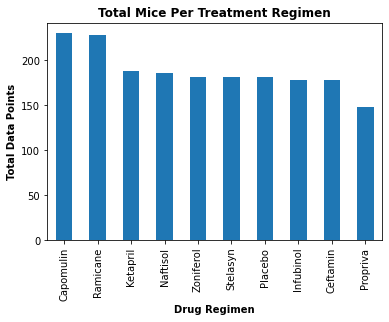

In [10]:
# Use Pandas to generate a bar plot showing the total number of mice in each treatment regimen throughout the course of the study. 
count=clean_data["Drug Regimen"].value_counts()
count.plot(kind="bar")
plt.xlabel("Drug Regimen", fontweight="bold")
plt.ylabel("Total Data Points", fontweight="bold")
plt.title("Total Mice Per Treatment Regimen", fontsize=12, fontweight="bold")
plt.show()
## Note: this plot will be identical to the one that uses Pyplot

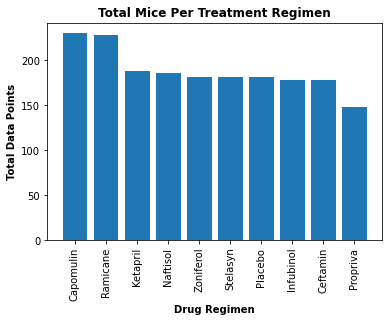

In [11]:
# Use Pyplot to generate a bar plot showing the total number of mice treatment in each treatment regimen throughout the course of the study.
count=clean_data["Drug Regimen"].value_counts()
plt.bar(count.index.values,count.values)
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen", fontweight="bold")
plt.ylabel("Total Data Points", fontweight="bold")
plt.title("Total Mice Per Treatment Regimen", fontsize=12, fontweight="bold")
plt.show()
##  Note: this plot will be identical to the one that uses Pandas

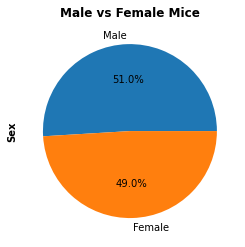

In [12]:
# Use Pandas to generate a pie plot showing the distribution of female versus male mice
count=clean_data["Sex"].value_counts()
plt.ylabel("Sex", fontweight="bold")
count.plot(kind="pie",autopct='%1.1f%%')
plt.title("Male vs Female Mice", fontsize=12, fontweight="bold")
plt.show()
## Note: this plot will be identical to the one that uses Pyplot

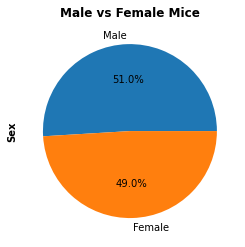

In [13]:
# Use Pyplot to generate a pie plot showing the distribution of female versus male mice
count=clean_data["Sex"].value_counts()
plt.pie(count.values,labels=count.index.values,autopct='%1.1f%%')
plt.ylabel("Sex", fontweight="bold")
plt.title("Male vs Female Mice", fontsize=12, fontweight="bold")
plt.show()
##  Note: this plot will be identical to the one that uses Pandas

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the drug regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (latest) timepoint for each mouse
max_tumor=clean_data.groupby(["Mouse ID"])["Timepoint"].max()
max_tumor=max_tumor.reset_index()


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_tumor=max_tumor.merge(clean_data,on=["Mouse ID","Timepoint"],how="left")
max_tumor

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [15]:
# Put the four drug regimens into a list that can be iterated over in a for-loop 
# (and later used for plot labels)
drug_list=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_list=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_volume=max_tumor.loc[max_tumor["Drug Regimen"]==drug,"Tumor Volume (mm3)"]
    
    # add subset 
    tumor_list.append(final_tumor_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_volume.loc[(final_tumor_volume < lower_bound) | (final_tumor_volume > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


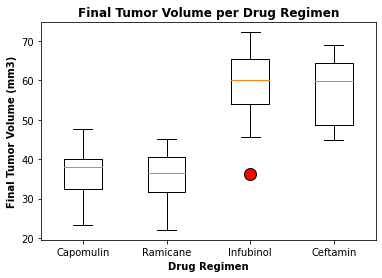

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='solid', markeredgecolor='k')

plt.boxplot(tumor_list, labels = drug_list, flierprops=flierprops)
plt.ylabel('Final Tumor Volume (mm3)', fontweight="bold")
plt.xlabel('Drug Regimen', fontweight="bold")
plt.title("Final Tumor Volume per Drug Regimen", fontsize=12, fontweight="bold")

plt.show()

## Line and Scatter Plots

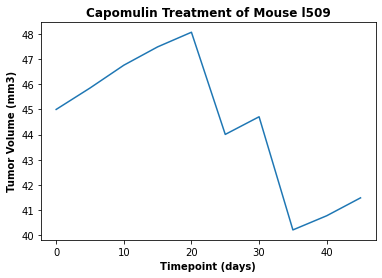

In [17]:
#Generate a line plot of tumor volume vs. timepoint for a mouse treated with Capomulin
capomulin_treatment = clean_data.loc[clean_data["Drug Regimen"]=="Capomulin"]
mouse_data = capomulin_treatment.loc[capomulin_treatment["Mouse ID"]=="l509"]
plt.plot(mouse_data["Timepoint"],mouse_data["Tumor Volume (mm3)"])

#Label the chart
plt.xlabel("Timepoint (days)", fontweight="bold")
plt.ylabel("Tumor Volume (mm3)", fontweight="bold")
plt.title("Capomulin Treatment of Mouse l509", fontsize=12, fontweight="bold")

# Show the chart
plt.show()

In [18]:
capomulin_treatment.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
226,j246,0,45.0,0,Capomulin,Female,21,21
227,r554,0,45.0,0,Capomulin,Female,8,17
228,s185,0,45.0,0,Capomulin,Female,3,17
229,b742,0,45.0,0,Capomulin,Male,7,21


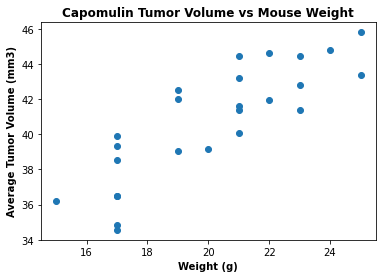

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen. 
# Note: this means mouse weight goes on the x-axis, with average tumor volume on the y-axis. 

average_tumor_volume=capomulin_treatment.groupby(["Mouse ID"]).mean()

plt.scatter(average_tumor_volume["Weight (g)"],average_tumor_volume["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)", fontweight="bold")
plt.ylabel("Average Tumor Volume (mm3)", fontweight="bold")
plt.title("Capomulin Tumor Volume vs Mouse Weight", fontsize=12, fontweight="bold")
plt.show()

## Correlation and Regression

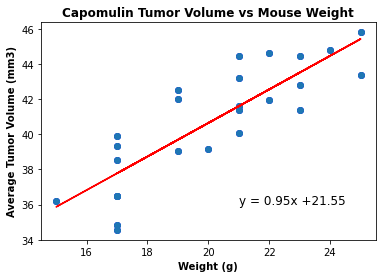

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen.

average_tumor_volume=capomulin_treatment.groupby(["Mouse ID"]).mean()

plt.scatter(average_tumor_volume["Weight (g)"],average_tumor_volume["Tumor Volume (mm3)"], marker="o", color="b")
plt.xlabel("Weight (g)", fontweight="bold")
plt.ylabel("Average Tumor Volume (mm3)", fontweight="bold")
plt.title("Capomulin Tumor Volume vs Mouse Weight", fontsize=12, fontweight="bold")

x_values = average_tumor_volume["Weight (g)"]
y_values = average_tumor_volume["Tumor Volume (mm3)"]

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(21,36),fontsize=12, color="black")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()